## Exploration of label switch for z

In [1]:
from collections import Counter,defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import pickle
from sklearn.metrics import adjusted_rand_score
from scipy.spatial import distance
import seaborn as sns
import tqdm

In [2]:
#from simulate_data import *
#from topic_model import *
from lda_clust.topic_model import *
from lda_clust.simulate_data import *

In [3]:
def ari_trace_fun(true_lab,post_draw_lab):
    trace_ari=np.zeros(len(post_draw_lab))
    for i in range(len(post_draw_lab)):
        trace_ari[i]=adjusted_rand_score(true_lab,post_draw_lab[i])
    return trace_ari

In [4]:
def clust_trace(post_draw):
    cl_trace=np.zeros(len(post_draw))
    for i in range(len(post_draw)):
        cl_trace[i]=len(np.unique(post_draw[i]))
    return cl_trace

In [5]:
def hamm_z(data,real_data):    
    c={}
    for i in tqdm.tqdm(range(len(data))):
        dic_temp={}
        for j in range(len(data[i])):
            ls_temp=list()
            for k in range(len(data[i][j])):
                ls_temp.append(distance.hamming(data[i][j][k],real_data[i][j]))
            dic_temp[j]=np.mean(ls_temp)
        c[i]=dic_temp
    return c

In [6]:
def ari_z(data,real_data):    
    c={}
    for i in tqdm.tqdm(range(len(data))):
        dic_temp={}
        for j in range(len(data[i])):
            ls_temp=list()
            for k in range(len(data[i][j])):
                ls_temp.append(adjusted_rand_score(data[i][j][k],real_data[i][j]))
            dic_temp[j]=np.mean(ls_temp)
        c[i]=dic_temp
    return c

In [22]:
def visual_heatmap(dic,ax = None): # argument dic is the dictionary with values the mean Hamming for each command from post draws
    df = pd.DataFrame(dic)
    sns.set(font_scale=2)
    g = sns.heatmap(df, cmap="Reds", annot=False, ax=ax,vmin=0, vmax=1)
    #g.figure.axes[-1].set_yticklabels(g.get_yticks(),size=15)
    g.invert_yaxis()
    #g.set_yticklabels(g.get_yticks(), size = 10)
    #g.set_xticks(g.get_yticks(), size = 5)
    #g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 18)
    return g

In [27]:
def doc_posit_high_Hamm(dic,cond): 
    '''function for detecting docs for which size of Hamm for z high'''
    mean_val=np.zeros(len(dic))
    ind=0
    for k in dic.values():
        list1=[]
        for l in k.values():
            list1.append(l)
        mean_val[ind]=np.mean(list1)
        ind+=1
    pos=[i for i in range(len(mean_val)) if mean_val[i] > cond]
    return pos

### Data with fixed structure


### Var M

#### Model 2

In [7]:
# Simulation results for both Gensim and Custom init
var_M_model2={}
var_N_model2={}
var_M_model2_custom={}
var_N_model2_custom={}
var=np.array(range(5,131,25))
for i in var:
    with open(f'./simul_results/fixed_structure/var_M/model_2/res_model_2_M_{str(i)}_custom.pkl','rb') as file:     
        var_M_model2_custom[f'M_{str(i)}']=pickle.load(file)
    with open(f'./simul_results/fixed_structure/var_N/model_2/res_model_2_N_{str(i)}_custom.pkl','rb') as file:     
        var_N_model2_custom[f'N_{str(i)}']=pickle.load(file)
    with open(f'./simul_results/fixed_structure/var_M/model_2/res_model_2_M_{str(i)}.pkl','rb') as file:     
        var_M_model2[f'M_{str(i)}']=pickle.load(file)
    with open(f'./simul_results/fixed_structure/var_N/model_2/res_model_2_N_{str(i)}.pkl','rb') as file:     
        var_N_model2[f'N_{str(i)}']=pickle.load(file)

In [8]:
#### MH step for label z test ####
with open(f'./simul_results/fixed_structure/var_M/model_2/res_model_2_M_105_gensim_MH_label_z.pkl','rb') as file:     
    test=pickle.load(file)

In [9]:
# Simulated data
var_M_model2_data={}
var_N_model2_data={}
var=np.array(range(5,131,25))
for i in var:
    with open(f'./simulated_data/fixed_structure/var_M/model_2/data_m2_M_{str(i)}.pkl','rb') as file:     
        var_M_model2_data[f'M_{str(i)}']=pickle.load(file)  
    with open(f'./simulated_data/fixed_structure/var_N/model_2/data_m2_N_{str(i)}.pkl','rb') as file:     
        var_N_model2_data[f'N_{str(i)}']=pickle.load(file)

<AxesSubplot:title={'center':'Model 2'}, xlabel='itearations', ylabel='ARI'>

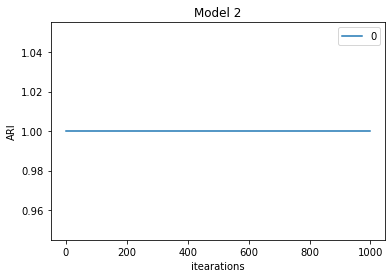

In [10]:
ari_trace2=ari_trace_fun(var_M_model2_data['M_105']['t'],test[0]['t'])
pd.DataFrame(ari_trace2).plot(xlabel = "itearations",ylabel="ARI",title="Model 2")

<AxesSubplot:title={'center':'Model 2'}, xlabel='itearations', ylabel='ARI'>

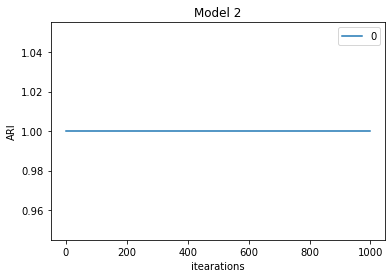

In [16]:
ari_trace2=ari_trace_fun(var_M_model2_data['M_105']['t'],var_M_model2['M_105'][0]['t'])
pd.DataFrame(ari_trace2).plot(xlabel = "itearations",ylabel="ARI",title="Model 2")

In [17]:
with open(f'./simul_results/fixed_structure/var_M/model_2/res_model_2_M_105_Hamm_z.pkl','rb') as file:     
    Hamm_z_m2=pickle.load(file)

In [18]:
c_m2_M_105=hamm_z(test[0]['z'],var_M_model2_data['M_105']['z'])

100%|██████████| 200/200 [00:21<00:00,  9.33it/s]


<AxesSubplot:>

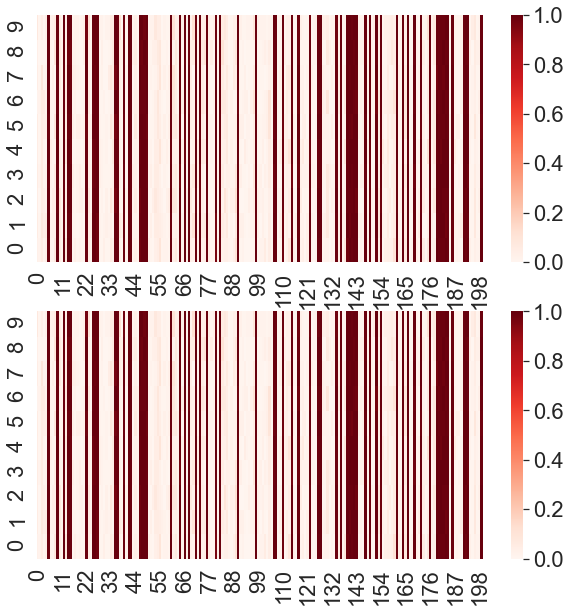

In [25]:
fig,axes = plt.subplots(2,1,figsize=(10,10))
visual_heatmap(c_m2_M_105,ax=axes[0])
visual_heatmap(Hamm_z_m2,ax=axes[1])


In [28]:
docs=doc_posit_high_Hamm(c_m2_M_105,0.9)

In [29]:
docs

[5,
 9,
 12,
 14,
 15,
 22,
 25,
 26,
 27,
 35,
 36,
 39,
 41,
 42,
 46,
 47,
 48,
 49,
 60,
 64,
 66,
 68,
 71,
 73,
 76,
 80,
 82,
 90,
 98,
 106,
 107,
 110,
 114,
 117,
 122,
 126,
 127,
 134,
 136,
 139,
 140,
 141,
 142,
 143,
 147,
 149,
 152,
 154,
 161,
 164,
 166,
 169,
 172,
 176,
 179,
 180,
 181,
 182,
 183,
 184,
 186,
 191,
 192,
 193,
 199]